In [1]:
from pyforest import*

In [2]:
lazy_imports()

['import plotly.express as px',
 'import os',
 'import re',
 'from pathlib import Path',
 'from sklearn.model_selection import StratifiedKFold',
 'import matplotlib as mpl',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from fbprophet import Prophet',
 'import plotly as py',
 'from sklearn.linear_model import LinearRegression',
 'import sklearn',
 'import pydot',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import imutils',
 'from scipy import signal as sg',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from sklearn.linear_model import ElasticNetCV',
 'import lightgbm as lgb',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.linear_model import RidgeCV',
 'import altair as alt',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from openpyxl import load_workbook',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.linear_model import L

In [5]:
data=pd.read_csv('BankNote_Authentication.csv')

<IPython.core.display.Javascript object>

In [6]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data Analysis

In [7]:
data.shape

(1372, 5)

In [9]:
data.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [10]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [14]:
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [26]:
import warnings
warnings.filterwarnings('ignore')

<br>
  Visualisations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

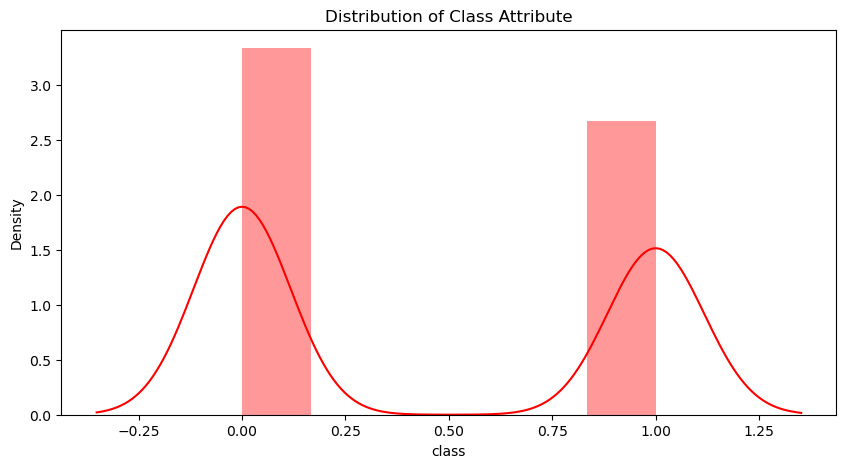

In [28]:
plt.figure(figsize=(10,5))
plt.title('Distribution of Class Attribute')
sns.distplot(data['class'],color='red');


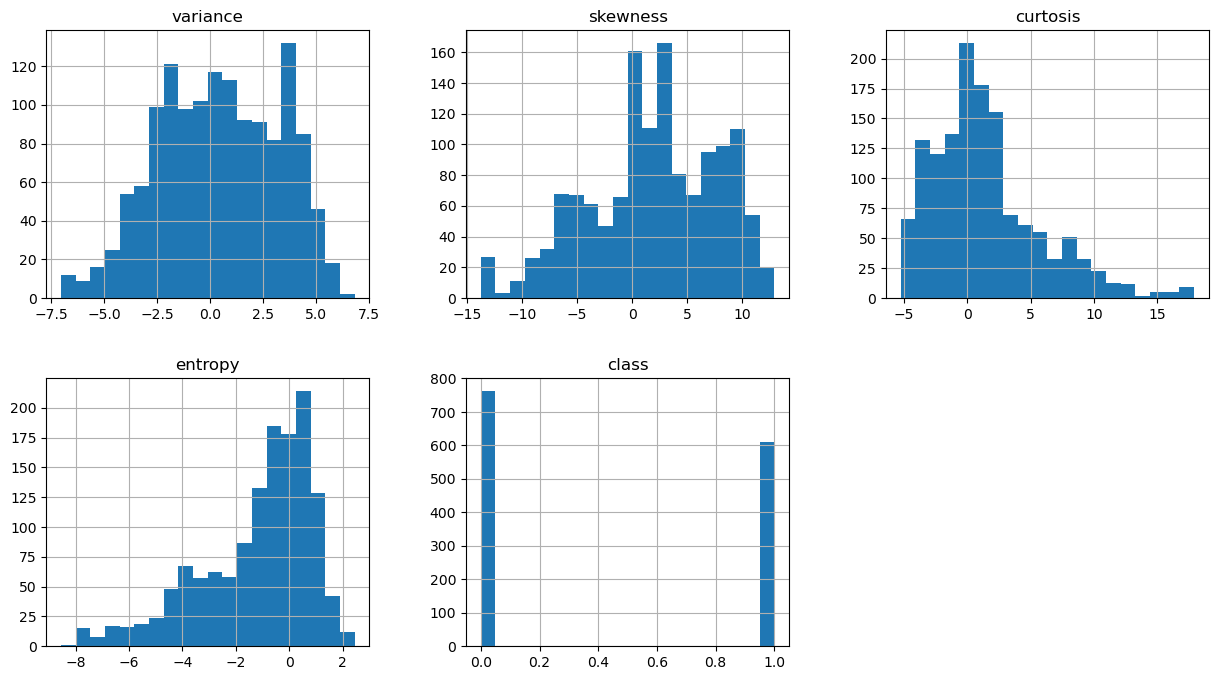

In [29]:
data.hist(bins=20,figsize=(15,8),layout=(2,3));

<IPython.core.display.Javascript object>

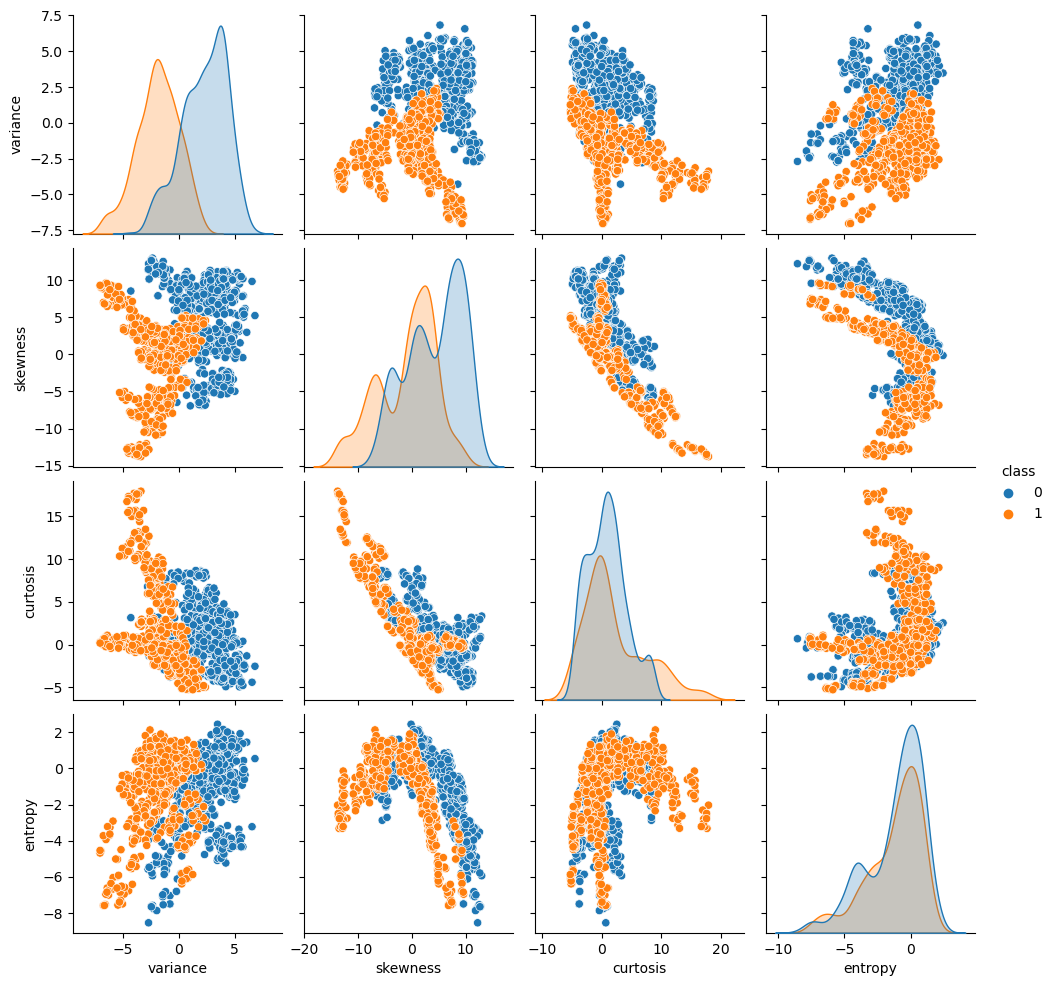

In [33]:
sns.pairplot(data,hue='class')

# Data Preparations

In [34]:
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [41]:
x = data.drop('class',axis=1)
y=data['class']


In [42]:
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [43]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.30,random_state=2)

<IPython.core.display.Javascript object>

In [53]:
X_train

,variance,skewness,curtosis,entropy
1097,-2.5919,-1.0553,3.89490,0.77757
1104,-3.0193,1.7775,0.73745,-0.45346
839,-1.3414,-2.0776,2.80930,0.60688
854,-2.5754,-5.6574,6.10300,0.65214
93,2.4486,-6.3175,7.96320,0.20602
...,...,...,...,...
466,1.1472,3.5985,1.93870,-0.43406
299,2.2928,9.0386,-3.24170,-1.29910
493,2.8084,11.3045,-3.33940,-4.41940
527,2.5328,7.5280,-0.41929,-2.64780


In [55]:
# values difference is high so we scale our data and scaling before train test split is bad practice

In [60]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [61]:
X_train

array([[-1.08489769, -0.54418805,  0.61371875,  0.94639827],
       [-1.23468557, -0.06474655, -0.12291473,  0.36690498],
       [-0.64664371, -0.71720875,  0.36044813,  0.8660479 ],
       ...,
       [ 0.80770761,  1.54766487, -1.07404435, -1.50001591],
       [ 0.71112001,  0.90850546, -0.39278232, -0.66605548],
       [-1.71920066, -2.55514114,  3.35756151, -0.21075714]])

In [62]:
X_test

array([[ 2.00007494,  0.78634333, -1.04172316,  0.38960377],
       [ 0.48949009,  1.13299096, -0.59493887, -1.20662879],
       [-0.37667781,  1.4305338 , -1.26503244, -3.14135661],
       ...,
       [ 0.26987616,  1.4655563 , -0.70837077, -0.33812156],
       [-0.44614149,  0.24903515, -0.67738373, -0.23100436],
       [-0.47234486, -0.10014449, -0.78390455,  0.30782702]])

In [63]:
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [66]:
model=LogisticRegression(solver='liblinear',random_state=1)
model.fit(X_train,Y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [70]:
accuracy=cross_val_score(estimator=model,X=X_train,y=Y_train,cv=10)
print('Accuracies:\n',accuracy)

Accuracies:
 [0.96875    0.98958333 0.97916667 1.         0.96875    0.98958333
 0.98958333 0.97916667 0.98958333 0.97916667]


In [72]:
print('Accuracy Mean:\n {:.3f}'.format(accuracy.mean()))


Accuracy Mean:
 0.983


In [77]:
prediction=model.predict(X_test)

In [78]:
prediction

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [81]:
model.score(X_train,Y_train)

0.9833333333333333

In [82]:
model.score(X_test,Y_test)

0.9878640776699029

<IPython.core.display.Javascript object>

<Axes: >

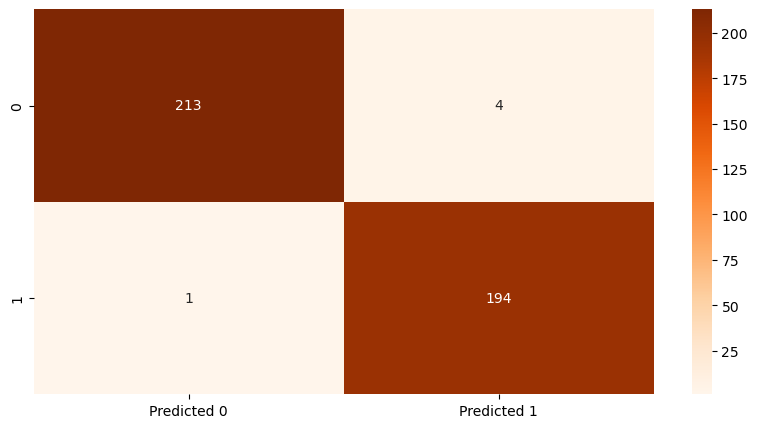

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
cm = confusion_matrix(Y_test, prediction,labels=[0,1])
cm_df=pd.DataFrame(cm,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, cmap='Oranges', fmt='g', cbar=True)

# Support Vector Machine

In [119]:
from sklearn.svm import SVC
model_1=SVC(kernel='linear')
model_1.fit(X_train,Y_train)

SVC(kernel='linear')

In [120]:
svm_accuracy=cross_val_score(estimator=model_1,X=X_train,y=Y_train,cv=10)
print('Accuracies:\n',accuracy)

Accuracies:
 [0.96875    0.98958333 0.97916667 1.         0.96875    0.98958333
 0.98958333 0.97916667 0.98958333 0.97916667]


In [210]:
print('Accuracy Mean:\n {:.3f}'.format(svm_accuracy.mean()))

Accuracy Mean:
 0.988


In [211]:
prediction_1=model_1.predict(X_test)

In [212]:
prediction_1

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [213]:
model_1.score(X_train,Y_train)

0.9875

In [214]:
model_1.score(X_test,Y_test)

0.9878640776699029

<IPython.core.display.Javascript object>

<Axes: >

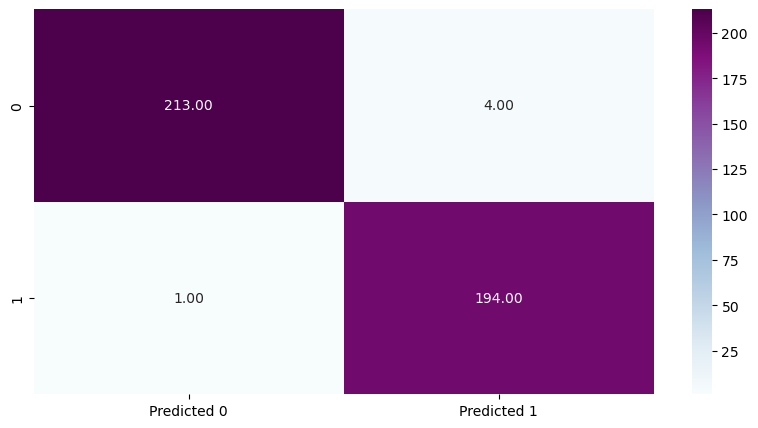

In [215]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
cm_1 = confusion_matrix(Y_test, prediction_1,labels=[0,1])
cm_df_1=pd.DataFrame(cm_1,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df_1, annot=True, cmap='BuPu', fmt='0.2f', cbar=True)

# Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier
model_2=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=1)
model_2.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, random_state=1)

In [154]:
rfc_accuracy=cross_val_score(estimator=model_2,X=X_train,y=Y_train,cv=10)
print('Accuracies:\n',accuracy)

Accuracies:
 [0.96875    0.98958333 0.97916667 1.         0.96875    0.98958333
 0.98958333 0.97916667 0.98958333 0.97916667]


In [216]:
print('Accuracy Mean:\n {:.3f}'.format(rfc_accuracy.mean()))

Accuracy Mean:
 1.000


In [217]:
prediction_2=model_2.predict(X_test)
prediction_2

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [218]:
model_2.score(X_train,Y_train)

1.0

In [219]:
model_2.score(X_test,Y_test)

0.9805825242718447

<IPython.core.display.Javascript object>

<Axes: >

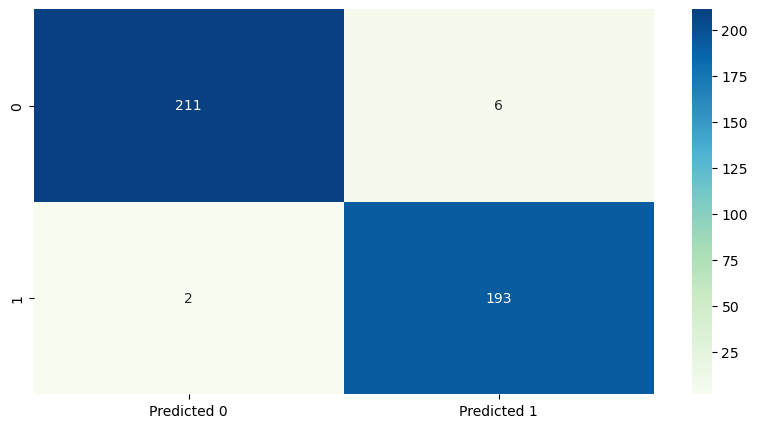

In [220]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
cm_2 = confusion_matrix(Y_test, prediction_2,labels=[0,1])
cm_df_2=pd.DataFrame(cm_2,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df_2, annot=True, cmap='GnBu', fmt='g', cbar=True)

# KNeighbors Classifier

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV

parameters={'leaf_size':[2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}
grid=GridSearchCV(KNeighborsClassifier(),param_grid=parameters)
grid.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [185]:
#which parameters are doing well
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [186]:
KNN=KNeighborsClassifier(n_neighbors= 2,p=1,leaf_size=2)

In [187]:
#call KNeighbirs algo 
KNN.fit(X_train,Y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [188]:
prediction_3=KNN.predict(X_test)
prediction_3

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [221]:
knn_accuracy=cross_val_score(estimator=KNN,X=X_train,y=Y_train,cv=10)
print('Accuracies:\n',accuracy)

Accuracies:
 [0.96875    0.98958333 0.97916667 1.         0.96875    0.98958333
 0.98958333 0.97916667 0.98958333 0.97916667]


In [222]:
print('Accuracy Mean:\n {:.3f}'.format(knn_accuracy.mean()))

Accuracy Mean:
 0.999


In [223]:
KNN.score(X_train,Y_train)

1.0

In [224]:
KNN.score(X_test,Y_test)

1.0

<IPython.core.display.Javascript object>

<Axes: >

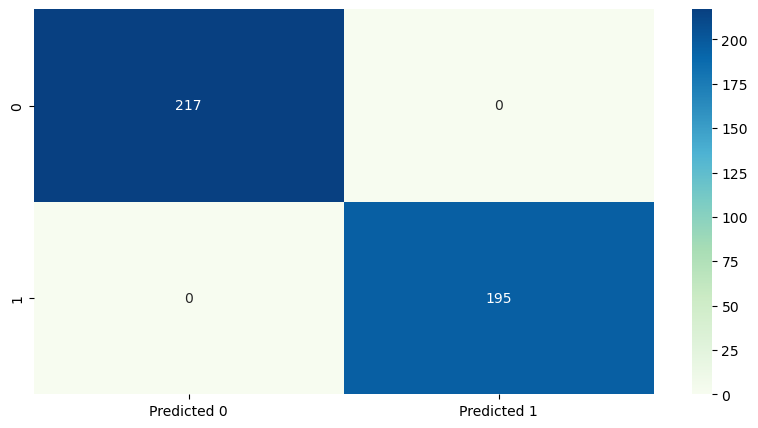

In [225]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
cm_3 = confusion_matrix(Y_test, prediction_3,labels=[0,1])
cm_df_3=pd.DataFrame(cm_3,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df_3, annot=True, cmap='GnBu', fmt='g', cbar=True)

# Multilayer Perception

In [196]:
from sklearn.neural_network import MLPClassifier

model_4 = MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, alpha=0.0001, solver='sgd', verbose=10, random_state=10, tol=0.000000001)
model_4.fit(X_train,Y_train)

Iteration 1, loss = 0.75576939
Iteration 2, loss = 0.75186173
Iteration 3, loss = 0.74632291
Iteration 4, loss = 0.73969474
Iteration 5, loss = 0.73301757
Iteration 6, loss = 0.72630833
Iteration 7, loss = 0.71970288
Iteration 8, loss = 0.71315643
Iteration 9, loss = 0.70728845
Iteration 10, loss = 0.70147367
Iteration 11, loss = 0.69572577
Iteration 12, loss = 0.69041345
Iteration 13, loss = 0.68548140
Iteration 14, loss = 0.68077981
Iteration 15, loss = 0.67629219
Iteration 16, loss = 0.67188804
Iteration 17, loss = 0.66797431
Iteration 18, loss = 0.66399021
Iteration 19, loss = 0.66028563
Iteration 20, loss = 0.65661964
Iteration 21, loss = 0.65315031
Iteration 22, loss = 0.64982424
Iteration 23, loss = 0.64650555
Iteration 24, loss = 0.64335387
Iteration 25, loss = 0.64033977
Iteration 26, loss = 0.63727883
Iteration 27, loss = 0.63429894
Iteration 28, loss = 0.63142111
Iteration 29, loss = 0.62853350
Iteration 30, loss = 0.62579710
Iteration 31, loss = 0.62302720
Iteration 32, los

Iteration 276, loss = 0.17039668
Iteration 277, loss = 0.16976602
Iteration 278, loss = 0.16914772
Iteration 279, loss = 0.16853281
Iteration 280, loss = 0.16791596
Iteration 281, loss = 0.16731469
Iteration 282, loss = 0.16670636
Iteration 283, loss = 0.16609969
Iteration 284, loss = 0.16550777
Iteration 285, loss = 0.16492298
Iteration 286, loss = 0.16433189
Iteration 287, loss = 0.16374916
Iteration 288, loss = 0.16317329
Iteration 289, loss = 0.16259706
Iteration 290, loss = 0.16202706
Iteration 291, loss = 0.16146370
Iteration 292, loss = 0.16090863
Iteration 293, loss = 0.16034536
Iteration 294, loss = 0.15978584
Iteration 295, loss = 0.15923097
Iteration 296, loss = 0.15868579
Iteration 297, loss = 0.15814075
Iteration 298, loss = 0.15759511
Iteration 299, loss = 0.15705702
Iteration 300, loss = 0.15652440
Iteration 301, loss = 0.15599041
Iteration 302, loss = 0.15546060
Iteration 303, loss = 0.15493589
Iteration 304, loss = 0.15441248
Iteration 305, loss = 0.15389807
Iteration 

Iteration 540, loss = 0.08593775
Iteration 541, loss = 0.08577376
Iteration 542, loss = 0.08560931
Iteration 543, loss = 0.08544545
Iteration 544, loss = 0.08528394
Iteration 545, loss = 0.08512352
Iteration 546, loss = 0.08496017
Iteration 547, loss = 0.08479818
Iteration 548, loss = 0.08463873
Iteration 549, loss = 0.08448041
Iteration 550, loss = 0.08432157
Iteration 551, loss = 0.08416355
Iteration 552, loss = 0.08400268
Iteration 553, loss = 0.08384618
Iteration 554, loss = 0.08368849
Iteration 555, loss = 0.08353410
Iteration 556, loss = 0.08337739
Iteration 557, loss = 0.08321814
Iteration 558, loss = 0.08306225
Iteration 559, loss = 0.08290876
Iteration 560, loss = 0.08275134
Iteration 561, loss = 0.08260166
Iteration 562, loss = 0.08244183
Iteration 563, loss = 0.08228754
Iteration 564, loss = 0.08213519
Iteration 565, loss = 0.08198253
Iteration 566, loss = 0.08182986
Iteration 567, loss = 0.08167764
Iteration 568, loss = 0.08153002
Iteration 569, loss = 0.08137789
Iteration 

Iteration 807, loss = 0.05608127
Iteration 808, loss = 0.05600582
Iteration 809, loss = 0.05593308
Iteration 810, loss = 0.05585654
Iteration 811, loss = 0.05578059
Iteration 812, loss = 0.05570837
Iteration 813, loss = 0.05563314
Iteration 814, loss = 0.05555863
Iteration 815, loss = 0.05548377
Iteration 816, loss = 0.05540911
Iteration 817, loss = 0.05533563
Iteration 818, loss = 0.05526190
Iteration 819, loss = 0.05518811
Iteration 820, loss = 0.05511509
Iteration 821, loss = 0.05504428
Iteration 822, loss = 0.05497043
Iteration 823, loss = 0.05489929
Iteration 824, loss = 0.05482252
Iteration 825, loss = 0.05475160
Iteration 826, loss = 0.05467976
Iteration 827, loss = 0.05461149
Iteration 828, loss = 0.05453785
Iteration 829, loss = 0.05446419
Iteration 830, loss = 0.05439108
Iteration 831, loss = 0.05432078
Iteration 832, loss = 0.05424719
Iteration 833, loss = 0.05417831
Iteration 834, loss = 0.05410572
Iteration 835, loss = 0.05403038
Iteration 836, loss = 0.05395863
Iteration 

Iteration 1081, loss = 0.03992287
Iteration 1082, loss = 0.03987554
Iteration 1083, loss = 0.03982636
Iteration 1084, loss = 0.03977538
Iteration 1085, loss = 0.03972842
Iteration 1086, loss = 0.03967994
Iteration 1087, loss = 0.03963084
Iteration 1088, loss = 0.03958275
Iteration 1089, loss = 0.03953473
Iteration 1090, loss = 0.03949062
Iteration 1091, loss = 0.03944090
Iteration 1092, loss = 0.03939225
Iteration 1093, loss = 0.03934408
Iteration 1094, loss = 0.03929752
Iteration 1095, loss = 0.03924833
Iteration 1096, loss = 0.03920510
Iteration 1097, loss = 0.03915668
Iteration 1098, loss = 0.03911176
Iteration 1099, loss = 0.03906143
Iteration 1100, loss = 0.03901359
Iteration 1101, loss = 0.03896832
Iteration 1102, loss = 0.03892408
Iteration 1103, loss = 0.03887505
Iteration 1104, loss = 0.03882839
Iteration 1105, loss = 0.03878221
Iteration 1106, loss = 0.03873782
Iteration 1107, loss = 0.03868837
Iteration 1108, loss = 0.03864418
Iteration 1109, loss = 0.03859672
Iteration 1110

Iteration 1349, loss = 0.02917380
Iteration 1350, loss = 0.02913959
Iteration 1351, loss = 0.02910369
Iteration 1352, loss = 0.02906910
Iteration 1353, loss = 0.02903406
Iteration 1354, loss = 0.02899667
Iteration 1355, loss = 0.02896130
Iteration 1356, loss = 0.02892629
Iteration 1357, loss = 0.02889154
Iteration 1358, loss = 0.02885622
Iteration 1359, loss = 0.02882023
Iteration 1360, loss = 0.02878584
Iteration 1361, loss = 0.02874905
Iteration 1362, loss = 0.02871498
Iteration 1363, loss = 0.02867935
Iteration 1364, loss = 0.02864463
Iteration 1365, loss = 0.02861181
Iteration 1366, loss = 0.02857692
Iteration 1367, loss = 0.02853996
Iteration 1368, loss = 0.02850678
Iteration 1369, loss = 0.02847368
Iteration 1370, loss = 0.02843795
Iteration 1371, loss = 0.02840473
Iteration 1372, loss = 0.02836896
Iteration 1373, loss = 0.02833478
Iteration 1374, loss = 0.02830101
Iteration 1375, loss = 0.02826760
Iteration 1376, loss = 0.02823392
Iteration 1377, loss = 0.02819953
Iteration 1378

Iteration 1614, loss = 0.02142538
Iteration 1615, loss = 0.02140039
Iteration 1616, loss = 0.02137613
Iteration 1617, loss = 0.02135335
Iteration 1618, loss = 0.02132853
Iteration 1619, loss = 0.02130515
Iteration 1620, loss = 0.02128230
Iteration 1621, loss = 0.02125711
Iteration 1622, loss = 0.02123279
Iteration 1623, loss = 0.02120992
Iteration 1624, loss = 0.02118628
Iteration 1625, loss = 0.02116213
Iteration 1626, loss = 0.02114004
Iteration 1627, loss = 0.02111506
Iteration 1628, loss = 0.02109203
Iteration 1629, loss = 0.02106863
Iteration 1630, loss = 0.02104609
Iteration 1631, loss = 0.02102153
Iteration 1632, loss = 0.02099815
Iteration 1633, loss = 0.02097523
Iteration 1634, loss = 0.02095138
Iteration 1635, loss = 0.02093000
Iteration 1636, loss = 0.02090629
Iteration 1637, loss = 0.02088197
Iteration 1638, loss = 0.02085855
Iteration 1639, loss = 0.02083555
Iteration 1640, loss = 0.02081355
Iteration 1641, loss = 0.02078934
Iteration 1642, loss = 0.02076637
Iteration 1643

Iteration 1883, loss = 0.01610852
Iteration 1884, loss = 0.01609323
Iteration 1885, loss = 0.01607684
Iteration 1886, loss = 0.01606106
Iteration 1887, loss = 0.01604537
Iteration 1888, loss = 0.01602889
Iteration 1889, loss = 0.01601343
Iteration 1890, loss = 0.01599713
Iteration 1891, loss = 0.01598185
Iteration 1892, loss = 0.01596616
Iteration 1893, loss = 0.01595086
Iteration 1894, loss = 0.01593464
Iteration 1895, loss = 0.01591862
Iteration 1896, loss = 0.01590272
Iteration 1897, loss = 0.01588787
Iteration 1898, loss = 0.01587168
Iteration 1899, loss = 0.01585591
Iteration 1900, loss = 0.01584145
Iteration 1901, loss = 0.01582476
Iteration 1902, loss = 0.01580879
Iteration 1903, loss = 0.01579349
Iteration 1904, loss = 0.01577823
Iteration 1905, loss = 0.01576254
Iteration 1906, loss = 0.01574738
Iteration 1907, loss = 0.01573188
Iteration 1908, loss = 0.01571629
Iteration 1909, loss = 0.01570085
Iteration 1910, loss = 0.01568600
Iteration 1911, loss = 0.01566984
Iteration 1912

Iteration 2125, loss = 0.01267047
Iteration 2126, loss = 0.01265862
Iteration 2127, loss = 0.01264632
Iteration 2128, loss = 0.01263355
Iteration 2129, loss = 0.01262158
Iteration 2130, loss = 0.01260929
Iteration 2131, loss = 0.01259697
Iteration 2132, loss = 0.01258463
Iteration 2133, loss = 0.01257331
Iteration 2134, loss = 0.01256031
Iteration 2135, loss = 0.01254902
Iteration 2136, loss = 0.01253665
Iteration 2137, loss = 0.01252475
Iteration 2138, loss = 0.01251183
Iteration 2139, loss = 0.01250037
Iteration 2140, loss = 0.01248855
Iteration 2141, loss = 0.01247582
Iteration 2142, loss = 0.01246479
Iteration 2143, loss = 0.01245253
Iteration 2144, loss = 0.01244038
Iteration 2145, loss = 0.01242815
Iteration 2146, loss = 0.01241653
Iteration 2147, loss = 0.01240550
Iteration 2148, loss = 0.01239215
Iteration 2149, loss = 0.01238098
Iteration 2150, loss = 0.01236881
Iteration 2151, loss = 0.01235694
Iteration 2152, loss = 0.01234496
Iteration 2153, loss = 0.01233389
Iteration 2154

Iteration 2383, loss = 0.00997795
Iteration 2384, loss = 0.00996906
Iteration 2385, loss = 0.00995870
Iteration 2386, loss = 0.00994961
Iteration 2387, loss = 0.00993999
Iteration 2388, loss = 0.00993039
Iteration 2389, loss = 0.00992077
Iteration 2390, loss = 0.00991145
Iteration 2391, loss = 0.00990187
Iteration 2392, loss = 0.00989240
Iteration 2393, loss = 0.00988346
Iteration 2394, loss = 0.00987342
Iteration 2395, loss = 0.00986396
Iteration 2396, loss = 0.00985523
Iteration 2397, loss = 0.00984583
Iteration 2398, loss = 0.00983585
Iteration 2399, loss = 0.00982674
Iteration 2400, loss = 0.00981730
Iteration 2401, loss = 0.00980820
Iteration 2402, loss = 0.00979848
Iteration 2403, loss = 0.00978926
Iteration 2404, loss = 0.00978027
Iteration 2405, loss = 0.00977056
Iteration 2406, loss = 0.00976162
Iteration 2407, loss = 0.00975217
Iteration 2408, loss = 0.00974289
Iteration 2409, loss = 0.00973369
Iteration 2410, loss = 0.00972400
Iteration 2411, loss = 0.00971466
Iteration 2412

Iteration 2629, loss = 0.00793904
Iteration 2630, loss = 0.00793198
Iteration 2631, loss = 0.00792564
Iteration 2632, loss = 0.00791819
Iteration 2633, loss = 0.00791142
Iteration 2634, loss = 0.00790435
Iteration 2635, loss = 0.00789729
Iteration 2636, loss = 0.00789093
Iteration 2637, loss = 0.00788333
Iteration 2638, loss = 0.00787648
Iteration 2639, loss = 0.00786974
Iteration 2640, loss = 0.00786237
Iteration 2641, loss = 0.00785570
Iteration 2642, loss = 0.00784878
Iteration 2643, loss = 0.00784189
Iteration 2644, loss = 0.00783539
Iteration 2645, loss = 0.00782851
Iteration 2646, loss = 0.00782163
Iteration 2647, loss = 0.00781511
Iteration 2648, loss = 0.00780758
Iteration 2649, loss = 0.00780114
Iteration 2650, loss = 0.00779418
Iteration 2651, loss = 0.00778735
Iteration 2652, loss = 0.00778057
Iteration 2653, loss = 0.00777406
Iteration 2654, loss = 0.00776700
Iteration 2655, loss = 0.00776046
Iteration 2656, loss = 0.00775377
Iteration 2657, loss = 0.00774707
Iteration 2658

Iteration 2873, loss = 0.00651419
Iteration 2874, loss = 0.00650922
Iteration 2875, loss = 0.00650453
Iteration 2876, loss = 0.00649956
Iteration 2877, loss = 0.00649457
Iteration 2878, loss = 0.00648976
Iteration 2879, loss = 0.00648478
Iteration 2880, loss = 0.00648025
Iteration 2881, loss = 0.00647505
Iteration 2882, loss = 0.00647050
Iteration 2883, loss = 0.00646590
Iteration 2884, loss = 0.00646135
Iteration 2885, loss = 0.00645579
Iteration 2886, loss = 0.00645101
Iteration 2887, loss = 0.00644622
Iteration 2888, loss = 0.00644174
Iteration 2889, loss = 0.00643661
Iteration 2890, loss = 0.00643200
Iteration 2891, loss = 0.00642696
Iteration 2892, loss = 0.00642227
Iteration 2893, loss = 0.00641758
Iteration 2894, loss = 0.00641275
Iteration 2895, loss = 0.00640812
Iteration 2896, loss = 0.00640335
Iteration 2897, loss = 0.00639861
Iteration 2898, loss = 0.00639379
Iteration 2899, loss = 0.00638955
Iteration 2900, loss = 0.00638442
Iteration 2901, loss = 0.00637972
Iteration 2902

Iteration 3132, loss = 0.00542844
Iteration 3133, loss = 0.00542445
Iteration 3134, loss = 0.00542094
Iteration 3135, loss = 0.00541738
Iteration 3136, loss = 0.00541381
Iteration 3137, loss = 0.00540992
Iteration 3138, loss = 0.00540660
Iteration 3139, loss = 0.00540279
Iteration 3140, loss = 0.00539930
Iteration 3141, loss = 0.00539563
Iteration 3142, loss = 0.00539194
Iteration 3143, loss = 0.00538854
Iteration 3144, loss = 0.00538494
Iteration 3145, loss = 0.00538125
Iteration 3146, loss = 0.00537780
Iteration 3147, loss = 0.00537411
Iteration 3148, loss = 0.00537085
Iteration 3149, loss = 0.00536708
Iteration 3150, loss = 0.00536377
Iteration 3151, loss = 0.00536025
Iteration 3152, loss = 0.00535676
Iteration 3153, loss = 0.00535308
Iteration 3154, loss = 0.00534944
Iteration 3155, loss = 0.00534615
Iteration 3156, loss = 0.00534265
Iteration 3157, loss = 0.00533921
Iteration 3158, loss = 0.00533549
Iteration 3159, loss = 0.00533215
Iteration 3160, loss = 0.00532910
Iteration 3161

Iteration 3389, loss = 0.00462017
Iteration 3390, loss = 0.00461747
Iteration 3391, loss = 0.00461476
Iteration 3392, loss = 0.00461219
Iteration 3393, loss = 0.00460941
Iteration 3394, loss = 0.00460653
Iteration 3395, loss = 0.00460393
Iteration 3396, loss = 0.00460111
Iteration 3397, loss = 0.00459839
Iteration 3398, loss = 0.00459552
Iteration 3399, loss = 0.00459297
Iteration 3400, loss = 0.00459022
Iteration 3401, loss = 0.00458750
Iteration 3402, loss = 0.00458470
Iteration 3403, loss = 0.00458196
Iteration 3404, loss = 0.00457936
Iteration 3405, loss = 0.00457693
Iteration 3406, loss = 0.00457377
Iteration 3407, loss = 0.00457117
Iteration 3408, loss = 0.00456832
Iteration 3409, loss = 0.00456576
Iteration 3410, loss = 0.00456316
Iteration 3411, loss = 0.00456045
Iteration 3412, loss = 0.00455765
Iteration 3413, loss = 0.00455490
Iteration 3414, loss = 0.00455251
Iteration 3415, loss = 0.00454960
Iteration 3416, loss = 0.00454686
Iteration 3417, loss = 0.00454446
Iteration 3418

Iteration 3654, loss = 0.00397467
Iteration 3655, loss = 0.00397247
Iteration 3656, loss = 0.00397016
Iteration 3657, loss = 0.00396802
Iteration 3658, loss = 0.00396609
Iteration 3659, loss = 0.00396371
Iteration 3660, loss = 0.00396175
Iteration 3661, loss = 0.00395958
Iteration 3662, loss = 0.00395742
Iteration 3663, loss = 0.00395554
Iteration 3664, loss = 0.00395316
Iteration 3665, loss = 0.00395097
Iteration 3666, loss = 0.00394890
Iteration 3667, loss = 0.00394669
Iteration 3668, loss = 0.00394473
Iteration 3669, loss = 0.00394255
Iteration 3670, loss = 0.00394032
Iteration 3671, loss = 0.00393821
Iteration 3672, loss = 0.00393617
Iteration 3673, loss = 0.00393419
Iteration 3674, loss = 0.00393251
Iteration 3675, loss = 0.00392993
Iteration 3676, loss = 0.00392778
Iteration 3677, loss = 0.00392564
Iteration 3678, loss = 0.00392382
Iteration 3679, loss = 0.00392162
Iteration 3680, loss = 0.00391943
Iteration 3681, loss = 0.00391728
Iteration 3682, loss = 0.00391527
Iteration 3683

Iteration 3900, loss = 0.00350117
Iteration 3901, loss = 0.00349941
Iteration 3902, loss = 0.00349769
Iteration 3903, loss = 0.00349596
Iteration 3904, loss = 0.00349426
Iteration 3905, loss = 0.00349254
Iteration 3906, loss = 0.00349099
Iteration 3907, loss = 0.00348908
Iteration 3908, loss = 0.00348741
Iteration 3909, loss = 0.00348567
Iteration 3910, loss = 0.00348410
Iteration 3911, loss = 0.00348227
Iteration 3912, loss = 0.00348070
Iteration 3913, loss = 0.00347886
Iteration 3914, loss = 0.00347715
Iteration 3915, loss = 0.00347549
Iteration 3916, loss = 0.00347375
Iteration 3917, loss = 0.00347209
Iteration 3918, loss = 0.00347035
Iteration 3919, loss = 0.00346886
Iteration 3920, loss = 0.00346724
Iteration 3921, loss = 0.00346526
Iteration 3922, loss = 0.00346360
Iteration 3923, loss = 0.00346188
Iteration 3924, loss = 0.00346027
Iteration 3925, loss = 0.00345861
Iteration 3926, loss = 0.00345682
Iteration 3927, loss = 0.00345533
Iteration 3928, loss = 0.00345352
Iteration 3929

Iteration 4156, loss = 0.00310199
Iteration 4157, loss = 0.00310061
Iteration 4158, loss = 0.00309916
Iteration 4159, loss = 0.00309770
Iteration 4160, loss = 0.00309629
Iteration 4161, loss = 0.00309501
Iteration 4162, loss = 0.00309343
Iteration 4163, loss = 0.00309212
Iteration 4164, loss = 0.00309066
Iteration 4165, loss = 0.00308933
Iteration 4166, loss = 0.00308787
Iteration 4167, loss = 0.00308644
Iteration 4168, loss = 0.00308501
Iteration 4169, loss = 0.00308356
Iteration 4170, loss = 0.00308242
Iteration 4171, loss = 0.00308093
Iteration 4172, loss = 0.00307941
Iteration 4173, loss = 0.00307803
Iteration 4174, loss = 0.00307652
Iteration 4175, loss = 0.00307518
Iteration 4176, loss = 0.00307374
Iteration 4177, loss = 0.00307242
Iteration 4178, loss = 0.00307097
Iteration 4179, loss = 0.00306957
Iteration 4180, loss = 0.00306822
Iteration 4181, loss = 0.00306680
Iteration 4182, loss = 0.00306534
Iteration 4183, loss = 0.00306400
Iteration 4184, loss = 0.00306262
Iteration 4185

Iteration 4427, loss = 0.00275355
Iteration 4428, loss = 0.00275240
Iteration 4429, loss = 0.00275119
Iteration 4430, loss = 0.00275008
Iteration 4431, loss = 0.00274891
Iteration 4432, loss = 0.00274773
Iteration 4433, loss = 0.00274655
Iteration 4434, loss = 0.00274551
Iteration 4435, loss = 0.00274431
Iteration 4436, loss = 0.00274317
Iteration 4437, loss = 0.00274202
Iteration 4438, loss = 0.00274075
Iteration 4439, loss = 0.00273974
Iteration 4440, loss = 0.00273848
Iteration 4441, loss = 0.00273735
Iteration 4442, loss = 0.00273630
Iteration 4443, loss = 0.00273514
Iteration 4444, loss = 0.00273400
Iteration 4445, loss = 0.00273288
Iteration 4446, loss = 0.00273168
Iteration 4447, loss = 0.00273060
Iteration 4448, loss = 0.00272942
Iteration 4449, loss = 0.00272827
Iteration 4450, loss = 0.00272717
Iteration 4451, loss = 0.00272606
Iteration 4452, loss = 0.00272500
Iteration 4453, loss = 0.00272390
Iteration 4454, loss = 0.00272269
Iteration 4455, loss = 0.00272169
Iteration 4456

Iteration 4682, loss = 0.00248563
Iteration 4683, loss = 0.00248467
Iteration 4684, loss = 0.00248376
Iteration 4685, loss = 0.00248271
Iteration 4686, loss = 0.00248182
Iteration 4687, loss = 0.00248077
Iteration 4688, loss = 0.00247988
Iteration 4689, loss = 0.00247890
Iteration 4690, loss = 0.00247799
Iteration 4691, loss = 0.00247694
Iteration 4692, loss = 0.00247596
Iteration 4693, loss = 0.00247504
Iteration 4694, loss = 0.00247414
Iteration 4695, loss = 0.00247317
Iteration 4696, loss = 0.00247216
Iteration 4697, loss = 0.00247134
Iteration 4698, loss = 0.00247034
Iteration 4699, loss = 0.00246929
Iteration 4700, loss = 0.00246835
Iteration 4701, loss = 0.00246742
Iteration 4702, loss = 0.00246639
Iteration 4703, loss = 0.00246549
Iteration 4704, loss = 0.00246456
Iteration 4705, loss = 0.00246353
Iteration 4706, loss = 0.00246264
Iteration 4707, loss = 0.00246165
Iteration 4708, loss = 0.00246070
Iteration 4709, loss = 0.00245975
Iteration 4710, loss = 0.00245884
Iteration 4711

Iteration 4941, loss = 0.00225502
Iteration 4942, loss = 0.00225421
Iteration 4943, loss = 0.00225340
Iteration 4944, loss = 0.00225259
Iteration 4945, loss = 0.00225175
Iteration 4946, loss = 0.00225089
Iteration 4947, loss = 0.00225012
Iteration 4948, loss = 0.00224933
Iteration 4949, loss = 0.00224854
Iteration 4950, loss = 0.00224774
Iteration 4951, loss = 0.00224684
Iteration 4952, loss = 0.00224599
Iteration 4953, loss = 0.00224520
Iteration 4954, loss = 0.00224448
Iteration 4955, loss = 0.00224353
Iteration 4956, loss = 0.00224284
Iteration 4957, loss = 0.00224201
Iteration 4958, loss = 0.00224127
Iteration 4959, loss = 0.00224033
Iteration 4960, loss = 0.00223959
Iteration 4961, loss = 0.00223864
Iteration 4962, loss = 0.00223783
Iteration 4963, loss = 0.00223708
Iteration 4964, loss = 0.00223620
Iteration 4965, loss = 0.00223540
Iteration 4966, loss = 0.00223462
Iteration 4967, loss = 0.00223381
Iteration 4968, loss = 0.00223300
Iteration 4969, loss = 0.00223228
Iteration 4970

Iteration 5184, loss = 0.00206885
Iteration 5185, loss = 0.00206812
Iteration 5186, loss = 0.00206743
Iteration 5187, loss = 0.00206674
Iteration 5188, loss = 0.00206601
Iteration 5189, loss = 0.00206527
Iteration 5190, loss = 0.00206462
Iteration 5191, loss = 0.00206389
Iteration 5192, loss = 0.00206318
Iteration 5193, loss = 0.00206243
Iteration 5194, loss = 0.00206178
Iteration 5195, loss = 0.00206106
Iteration 5196, loss = 0.00206033
Iteration 5197, loss = 0.00205961
Iteration 5198, loss = 0.00205892
Iteration 5199, loss = 0.00205823
Iteration 5200, loss = 0.00205752
Iteration 5201, loss = 0.00205683
Iteration 5202, loss = 0.00205612
Iteration 5203, loss = 0.00205541
Iteration 5204, loss = 0.00205471
Iteration 5205, loss = 0.00205399
Iteration 5206, loss = 0.00205330
Iteration 5207, loss = 0.00205261
Iteration 5208, loss = 0.00205189
Iteration 5209, loss = 0.00205117
Iteration 5210, loss = 0.00205049
Iteration 5211, loss = 0.00204974
Iteration 5212, loss = 0.00204909
Iteration 5213

Iteration 5437, loss = 0.00190119
Iteration 5438, loss = 0.00190049
Iteration 5439, loss = 0.00189984
Iteration 5440, loss = 0.00189923
Iteration 5441, loss = 0.00189862
Iteration 5442, loss = 0.00189801
Iteration 5443, loss = 0.00189749
Iteration 5444, loss = 0.00189683
Iteration 5445, loss = 0.00189618
Iteration 5446, loss = 0.00189569
Iteration 5447, loss = 0.00189496
Iteration 5448, loss = 0.00189435
Iteration 5449, loss = 0.00189373
Iteration 5450, loss = 0.00189317
Iteration 5451, loss = 0.00189258
Iteration 5452, loss = 0.00189193
Iteration 5453, loss = 0.00189129
Iteration 5454, loss = 0.00189070
Iteration 5455, loss = 0.00189008
Iteration 5456, loss = 0.00188951
Iteration 5457, loss = 0.00188886
Iteration 5458, loss = 0.00188824
Iteration 5459, loss = 0.00188769
Iteration 5460, loss = 0.00188707
Iteration 5461, loss = 0.00188642
Iteration 5462, loss = 0.00188582
Iteration 5463, loss = 0.00188524
Iteration 5464, loss = 0.00188462
Iteration 5465, loss = 0.00188401
Iteration 5466

Iteration 5682, loss = 0.00175997
Iteration 5683, loss = 0.00175939
Iteration 5684, loss = 0.00175885
Iteration 5685, loss = 0.00175828
Iteration 5686, loss = 0.00175778
Iteration 5687, loss = 0.00175725
Iteration 5688, loss = 0.00175672
Iteration 5689, loss = 0.00175615
Iteration 5690, loss = 0.00175558
Iteration 5691, loss = 0.00175506
Iteration 5692, loss = 0.00175456
Iteration 5693, loss = 0.00175397
Iteration 5694, loss = 0.00175347
Iteration 5695, loss = 0.00175290
Iteration 5696, loss = 0.00175241
Iteration 5697, loss = 0.00175186
Iteration 5698, loss = 0.00175131
Iteration 5699, loss = 0.00175076
Iteration 5700, loss = 0.00175020
Iteration 5701, loss = 0.00174976
Iteration 5702, loss = 0.00174920
Iteration 5703, loss = 0.00174868
Iteration 5704, loss = 0.00174811
Iteration 5705, loss = 0.00174762
Iteration 5706, loss = 0.00174701
Iteration 5707, loss = 0.00174651
Iteration 5708, loss = 0.00174598
Iteration 5709, loss = 0.00174545
Iteration 5710, loss = 0.00174495
Iteration 5711

Iteration 5932, loss = 0.00163400
Iteration 5933, loss = 0.00163355
Iteration 5934, loss = 0.00163309
Iteration 5935, loss = 0.00163259
Iteration 5936, loss = 0.00163216
Iteration 5937, loss = 0.00163170
Iteration 5938, loss = 0.00163116
Iteration 5939, loss = 0.00163076
Iteration 5940, loss = 0.00163025
Iteration 5941, loss = 0.00162978
Iteration 5942, loss = 0.00162933
Iteration 5943, loss = 0.00162886
Iteration 5944, loss = 0.00162839
Iteration 5945, loss = 0.00162794
Iteration 5946, loss = 0.00162745
Iteration 5947, loss = 0.00162702
Iteration 5948, loss = 0.00162655
Iteration 5949, loss = 0.00162606
Iteration 5950, loss = 0.00162558
Iteration 5951, loss = 0.00162509
Iteration 5952, loss = 0.00162466
Iteration 5953, loss = 0.00162419
Iteration 5954, loss = 0.00162375
Iteration 5955, loss = 0.00162325
Iteration 5956, loss = 0.00162277
Iteration 5957, loss = 0.00162237
Iteration 5958, loss = 0.00162196
Iteration 5959, loss = 0.00162139
Iteration 5960, loss = 0.00162092
Iteration 5961

Iteration 6189, loss = 0.00152055
Iteration 6190, loss = 0.00152013
Iteration 6191, loss = 0.00151969
Iteration 6192, loss = 0.00151937
Iteration 6193, loss = 0.00151894
Iteration 6194, loss = 0.00151848
Iteration 6195, loss = 0.00151809
Iteration 6196, loss = 0.00151767
Iteration 6197, loss = 0.00151725
Iteration 6198, loss = 0.00151682
Iteration 6199, loss = 0.00151643
Iteration 6200, loss = 0.00151601
Iteration 6201, loss = 0.00151559
Iteration 6202, loss = 0.00151522
Iteration 6203, loss = 0.00151478
Iteration 6204, loss = 0.00151435
Iteration 6205, loss = 0.00151394
Iteration 6206, loss = 0.00151359
Iteration 6207, loss = 0.00151315
Iteration 6208, loss = 0.00151275
Iteration 6209, loss = 0.00151236
Iteration 6210, loss = 0.00151194
Iteration 6211, loss = 0.00151151
Iteration 6212, loss = 0.00151103
Iteration 6213, loss = 0.00151066
Iteration 6214, loss = 0.00151028
Iteration 6215, loss = 0.00150984
Iteration 6216, loss = 0.00150942
Iteration 6217, loss = 0.00150906
Iteration 6218

Iteration 6447, loss = 0.00141987
Iteration 6448, loss = 0.00141949
Iteration 6449, loss = 0.00141911
Iteration 6450, loss = 0.00141875
Iteration 6451, loss = 0.00141839
Iteration 6452, loss = 0.00141800
Iteration 6453, loss = 0.00141766
Iteration 6454, loss = 0.00141729
Iteration 6455, loss = 0.00141687
Iteration 6456, loss = 0.00141656
Iteration 6457, loss = 0.00141621
Iteration 6458, loss = 0.00141580
Iteration 6459, loss = 0.00141547
Iteration 6460, loss = 0.00141507
Iteration 6461, loss = 0.00141473
Iteration 6462, loss = 0.00141438
Iteration 6463, loss = 0.00141399
Iteration 6464, loss = 0.00141366
Iteration 6465, loss = 0.00141328
Iteration 6466, loss = 0.00141296
Iteration 6467, loss = 0.00141258
Iteration 6468, loss = 0.00141221
Iteration 6469, loss = 0.00141185
Iteration 6470, loss = 0.00141149
Iteration 6471, loss = 0.00141111
Iteration 6472, loss = 0.00141076
Iteration 6473, loss = 0.00141038
Iteration 6474, loss = 0.00141004
Iteration 6475, loss = 0.00140968
Iteration 6476

Iteration 6698, loss = 0.00133279
Iteration 6699, loss = 0.00133249
Iteration 6700, loss = 0.00133216
Iteration 6701, loss = 0.00133186
Iteration 6702, loss = 0.00133147
Iteration 6703, loss = 0.00133128
Iteration 6704, loss = 0.00133082
Iteration 6705, loss = 0.00133049
Iteration 6706, loss = 0.00133020
Iteration 6707, loss = 0.00132988
Iteration 6708, loss = 0.00132951
Iteration 6709, loss = 0.00132924
Iteration 6710, loss = 0.00132888
Iteration 6711, loss = 0.00132856
Iteration 6712, loss = 0.00132825
Iteration 6713, loss = 0.00132790
Iteration 6714, loss = 0.00132755
Iteration 6715, loss = 0.00132727
Iteration 6716, loss = 0.00132695
Iteration 6717, loss = 0.00132659
Iteration 6718, loss = 0.00132630
Iteration 6719, loss = 0.00132597
Iteration 6720, loss = 0.00132567
Iteration 6721, loss = 0.00132532
Iteration 6722, loss = 0.00132496
Iteration 6723, loss = 0.00132467
Iteration 6724, loss = 0.00132437
Iteration 6725, loss = 0.00132400
Iteration 6726, loss = 0.00132367
Iteration 6727

Iteration 6955, loss = 0.00125308
Iteration 6956, loss = 0.00125279
Iteration 6957, loss = 0.00125250
Iteration 6958, loss = 0.00125222
Iteration 6959, loss = 0.00125193
Iteration 6960, loss = 0.00125160
Iteration 6961, loss = 0.00125128
Iteration 6962, loss = 0.00125101
Iteration 6963, loss = 0.00125070
Iteration 6964, loss = 0.00125041
Iteration 6965, loss = 0.00125018
Iteration 6966, loss = 0.00124982
Iteration 6967, loss = 0.00124953
Iteration 6968, loss = 0.00124923
Iteration 6969, loss = 0.00124893
Iteration 6970, loss = 0.00124869
Iteration 6971, loss = 0.00124837
Iteration 6972, loss = 0.00124806
Iteration 6973, loss = 0.00124781
Iteration 6974, loss = 0.00124749
Iteration 6975, loss = 0.00124720
Iteration 6976, loss = 0.00124689
Iteration 6977, loss = 0.00124661
Iteration 6978, loss = 0.00124635
Iteration 6979, loss = 0.00124604
Iteration 6980, loss = 0.00124579
Iteration 6981, loss = 0.00124546
Iteration 6982, loss = 0.00124521
Iteration 6983, loss = 0.00124490
Iteration 6984

Iteration 7202, loss = 0.00118399
Iteration 7203, loss = 0.00118375
Iteration 7204, loss = 0.00118346
Iteration 7205, loss = 0.00118320
Iteration 7206, loss = 0.00118300
Iteration 7207, loss = 0.00118266
Iteration 7208, loss = 0.00118241
Iteration 7209, loss = 0.00118218
Iteration 7210, loss = 0.00118187
Iteration 7211, loss = 0.00118160
Iteration 7212, loss = 0.00118134
Iteration 7213, loss = 0.00118107
Iteration 7214, loss = 0.00118081
Iteration 7215, loss = 0.00118053
Iteration 7216, loss = 0.00118032
Iteration 7217, loss = 0.00118000
Iteration 7218, loss = 0.00117977
Iteration 7219, loss = 0.00117949
Iteration 7220, loss = 0.00117922
Iteration 7221, loss = 0.00117899
Iteration 7222, loss = 0.00117870
Iteration 7223, loss = 0.00117844
Iteration 7224, loss = 0.00117817
Iteration 7225, loss = 0.00117791
Iteration 7226, loss = 0.00117767
Iteration 7227, loss = 0.00117742
Iteration 7228, loss = 0.00117712
Iteration 7229, loss = 0.00117686
Iteration 7230, loss = 0.00117660
Iteration 7231

Iteration 7454, loss = 0.00112029
Iteration 7455, loss = 0.00112004
Iteration 7456, loss = 0.00111984
Iteration 7457, loss = 0.00111960
Iteration 7458, loss = 0.00111935
Iteration 7459, loss = 0.00111909
Iteration 7460, loss = 0.00111881
Iteration 7461, loss = 0.00111862
Iteration 7462, loss = 0.00111838
Iteration 7463, loss = 0.00111813
Iteration 7464, loss = 0.00111788
Iteration 7465, loss = 0.00111765
Iteration 7466, loss = 0.00111744
Iteration 7467, loss = 0.00111721
Iteration 7468, loss = 0.00111695
Iteration 7469, loss = 0.00111665
Iteration 7470, loss = 0.00111643
Iteration 7471, loss = 0.00111621
Iteration 7472, loss = 0.00111596
Iteration 7473, loss = 0.00111570
Iteration 7474, loss = 0.00111555
Iteration 7475, loss = 0.00111523
Iteration 7476, loss = 0.00111503
Iteration 7477, loss = 0.00111475
Iteration 7478, loss = 0.00111451
Iteration 7479, loss = 0.00111427
Iteration 7480, loss = 0.00111407
Iteration 7481, loss = 0.00111380
Iteration 7482, loss = 0.00111356
Iteration 7483

Iteration 7706, loss = 0.00106262
Iteration 7707, loss = 0.00106237
Iteration 7708, loss = 0.00106217
Iteration 7709, loss = 0.00106202
Iteration 7710, loss = 0.00106173
Iteration 7711, loss = 0.00106153
Iteration 7712, loss = 0.00106128
Iteration 7713, loss = 0.00106109
Iteration 7714, loss = 0.00106086
Iteration 7715, loss = 0.00106064
Iteration 7716, loss = 0.00106044
Iteration 7717, loss = 0.00106021
Iteration 7718, loss = 0.00106001
Iteration 7719, loss = 0.00105978
Iteration 7720, loss = 0.00105961
Iteration 7721, loss = 0.00105935
Iteration 7722, loss = 0.00105913
Iteration 7723, loss = 0.00105893
Iteration 7724, loss = 0.00105870
Iteration 7725, loss = 0.00105847
Iteration 7726, loss = 0.00105827
Iteration 7727, loss = 0.00105805
Iteration 7728, loss = 0.00105783
Iteration 7729, loss = 0.00105763
Iteration 7730, loss = 0.00105741
Iteration 7731, loss = 0.00105722
Iteration 7732, loss = 0.00105698
Iteration 7733, loss = 0.00105677
Iteration 7734, loss = 0.00105657
Iteration 7735

Iteration 7957, loss = 0.00101052
Iteration 7958, loss = 0.00101032
Iteration 7959, loss = 0.00101017
Iteration 7960, loss = 0.00100992
Iteration 7961, loss = 0.00100975
Iteration 7962, loss = 0.00100951
Iteration 7963, loss = 0.00100933
Iteration 7964, loss = 0.00100914
Iteration 7965, loss = 0.00100895
Iteration 7966, loss = 0.00100876
Iteration 7967, loss = 0.00100856
Iteration 7968, loss = 0.00100836
Iteration 7969, loss = 0.00100815
Iteration 7970, loss = 0.00100795
Iteration 7971, loss = 0.00100778
Iteration 7972, loss = 0.00100761
Iteration 7973, loss = 0.00100738
Iteration 7974, loss = 0.00100716
Iteration 7975, loss = 0.00100697
Iteration 7976, loss = 0.00100677
Iteration 7977, loss = 0.00100660
Iteration 7978, loss = 0.00100640
Iteration 7979, loss = 0.00100621
Iteration 7980, loss = 0.00100601
Iteration 7981, loss = 0.00100585
Iteration 7982, loss = 0.00100560
Iteration 7983, loss = 0.00100539
Iteration 7984, loss = 0.00100521
Iteration 7985, loss = 0.00100507
Iteration 7986

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=10,
              solver='sgd', tol=1e-09, verbose=10)

In [197]:
prediction_4=model_4.predict(X_test)
prediction_3

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

<IPython.core.display.Javascript object>

<Axes: >

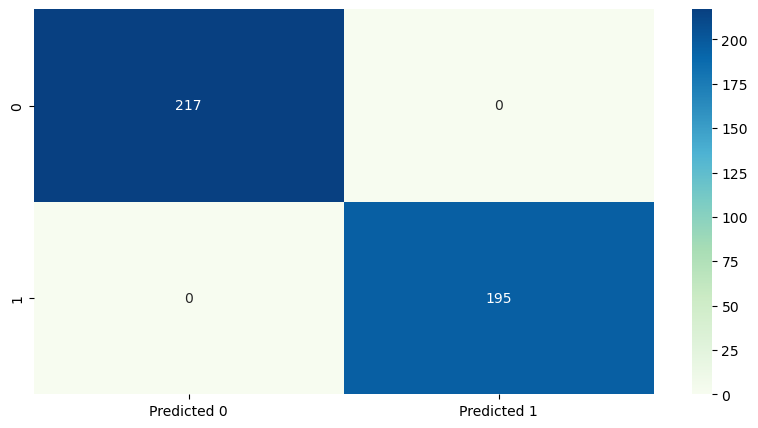

In [199]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute confusion matrix
cm_4 = confusion_matrix(Y_test, prediction_4,labels=[0,1])
cm_df_4=pd.DataFrame(cm_4,index=[i for i in [0,1]],columns=[i for i in ['Predicted 0','Predicted 1']])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df_4, annot=True, cmap='GnBu', fmt='g', cbar=True)

# Printing all the accuracy scores of ALOGRITHMs

In [233]:
print('LogisticRegression:\n {:.2f}'.format(accuracy.mean()))
print('Support Vector Machine(kernel=liblinear):\n {:.2f}'.format(svm_accuracy.mean()))
print('Random Forest Classifier:\n {:.2f}'.format(rfc_accuracy.mean()))
print('KNeighbor Classifier:\n {:.2f}'.format(knn_accuracy.mean()))
print('MultiLayer Perception:\n {}%'.format(100))


LogisticRegression:
 0.98
Support Vector Machine(kernel=liblinear):
 0.99
Random Forest Classifier:
 1.00
KNeighbor Classifier:
 1.00
MultiLayer Perception:
 100%
